<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session12/blob/master/Session12_Assignment_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import json
dog_cooc_dataset = "/content/gdrive/My Drive/EVA 4/via_export_coco_new.json"
annot_cooc = json.load(open(dog_cooc_dataset))

In [259]:
import pandas as pd
import math
df = pd.DataFrame()

data = []
for key, value in annot_cooc.items():
    if key != "info":
        if key == "images":
            count = 0
            for img in value:
                for k, v in img.items():
                    if k == "file_name":
                        dic[count] = {'name': v }
                    if k == "width":
                        w = v
                    if k == "height":
                        h = v
                dic[count]['image_w'] = w
                dic[count]['image_h'] = h
                count+=1
                    
        if key == "annotations":
            count = 0
            for val in value:
                for k, v in val.items():
                    if k == "bbox":
                        dic[count]['x'] = v[0]
                        dic[count]['y'] = v[1]
                        dic[count]['w'] = v[2]
                        dic[count]['h'] = v[3]
                count+=1
            
        if key == "licenses":
            break
        
count = 0
for k , v in dic.items():
    for key, val in v.items():
        if key == "w":
            w = val
        if key == "h":
            h = val
        if key == "image_h":
            image_h = val
        if key == "image_w":
            image_w = val
    dic[count]['height'] = image_h/h
    dic[count]['width'] = s['width']/w
    dic[count]['log_height'] = math.log(s['height']/h)
    dic[count]['log_width'] = math.log(s['width']/h)
    count +=1

df = pd.DataFrame.from_dict(dic, orient='index')
df.head()


,name,image_w,image_h,x,y,w,h,height,width,log_height,log_width
0,1.jpg,381,499,66,46,277,439,1.136674,0.649819,-0.796232,-0.891543
1,2.jpg,296,299,4,18,267,279,1.071685,0.674157,-0.342945,-0.438255
2,3.jpg,300,299,29,50,230,208,1.437500,0.782609,-0.049271,-0.144581
3,4.jpg,374,288,11,32,359,238,1.210084,0.501393,-0.184004,-0.279314
4,5.jpg,315,465,49,87,193,317,1.466877,0.932642,-0.470635,-0.565945


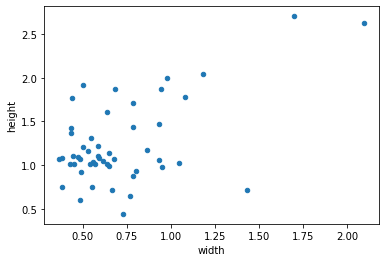

In [244]:
df.plot.scatter('width', 'height')

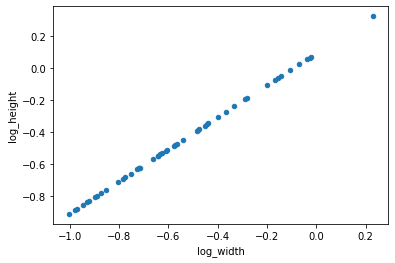

In [245]:
df.plot.scatter('log_width', 'log_height')

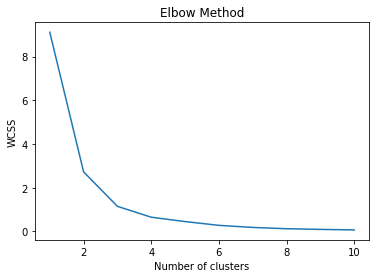

In [264]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

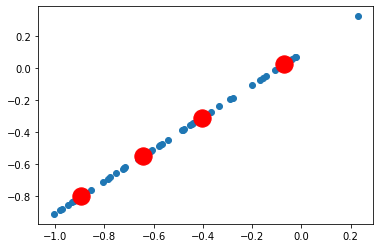

In [262]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()